In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
data = pd.read_csv('E:/online retail/OnlineRetailcsv.csv')

In [233]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [234]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51090,540640,79321,CHILLI LIGHTS,1,1/10/2011 12:36,4.95,14527.0,United Kingdom
47085,540373,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,1/6/2011 17:10,4.95,13280.0,United Kingdom
106905,545377,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,2,3/2/2011 11:32,0.85,14606.0,United Kingdom
197719,553931,21901,"KEY FOB , BACK DOOR",24,5/20/2011 10:27,0.65,14911.0,EIRE
257794,559544,21207,SKULL AND CROSSBONES GARLAND,1,7/10/2011 13:52,1.65,17126.0,United Kingdom
235395,557639,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,6/21/2011 16:13,2.10,12933.0,United Kingdom
77812,542789,22024,RAINY LADIES BIRTHDAY CARD,72,2/1/2011 10:38,0.36,17511.0,United Kingdom
71335,542115,21363,HOME SMALL WOOD LETTERS,1,1/25/2011 14:01,10.79,NaN,United Kingdom
112401,545895,22822,CREAM WALL PLANTER HEART SHAPED,1,3/7/2011 17:14,12.46,NaN,United Kingdom
512163,579512,15039,SANDALWOOD FAN,1,11/29/2011 16:47,1.63,NaN,United Kingdom


### 🧹 Step 1 — Data Cleaning & Preparation

Load the dataset into Pandas and show the first 10 rows.
→ (pd.read_csv, .head())

Check missing values in all columns.
→ (.isna().sum())

Handle missing values properly:

Remove rows where CustomerID is missing.

Handle missing Description sensibly.

Check data types of all columns.
→ (.info())

Remove cancelled transactions:

Invoices starting with “C” mean cancellations. Remove them.

Remove incorrect or negative data:

Drop rows where Quantity <= 0 or UnitPrice <= 0.

Create a new column called TotalPrice = Quantity * UnitPrice.

Convert InvoiceDate to proper datetime (if not already).

In [235]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [236]:
data = data.dropna(subset = 'CustomerID')

In [237]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [238]:
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [239]:
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]


In [240]:
data['InvoiceNo'].astype(str).str.startswith('C').sum()


np.int64(0)

In [241]:
data = data[(data['Quantity'] > 0) | (data['UnitPrice'] < 0)]

In [242]:
(data['Quantity'] == 0).sum()

np.int64(0)

In [243]:
(data['UnitPrice'] == 0).sum()

np.int64(40)

In [244]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [245]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [246]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])



In [247]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## 📊 Step 2 — Basic Analysis (Client Insight Questions)

How many unique customers are there?

How many unique products are sold?

Which country has the most orders?

Which product has the highest total sales (TotalPrice)?

Which product has been sold the most (by quantity)?

What is the total revenue of the store?

What is the average order value (AOV)?

Which month has the highest sales?

Which day of the week has the most transactions?

What hour of the day has the most sales (time pattern)?

In [248]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [249]:
unique_customers = data['CustomerID'].nunique()

In [250]:
unique_products = data['Description'].nunique()

In [251]:
# which country has the most orders
data['Country'].value_counts().sort_values(ascending=False)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [252]:
# Which product has the highest total sales (TotalPrice)?
total_sales = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

In [253]:
total_sales.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

In [254]:
# Which product has been sold the most (by quantity)?
data.groupby('Description')['Quantity'].sum().value_counts(ascending=False).head(1)

Quantity
6    64
Name: count, dtype: int64

In [255]:
# What is the total revenue of the store?
total_rev = data['TotalPrice'].sum()
print(f"Total Revenue : £{total_rev:,.2f}")

Total Revenue : £8,911,407.90


In [256]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [257]:
# What is the average order value (AOV)?
# AOV = Total Revenue / numbers of orders
aov = data['TotalPrice'].sum() / data['InvoiceNo'].nunique()
print(f"Average Order Value: £{aov:.2f}")


Average Order Value: £480.76


In [258]:
# Which month has the highest sales?
data.groupby(data['InvoiceDate'].dt.month)['TotalPrice'].sum().sort_values(ascending=False)

InvoiceDate
11    1161817.380
12    1090906.680
10    1039318.790
9      952838.382
5      678594.560
6      661213.690
8      645343.900
7      600091.011
3      595500.760
1      569445.040
4      469200.361
2      447137.350
Name: TotalPrice, dtype: float64

In [259]:
# names of the months
data['Months'] = data['InvoiceDate'].dt.strftime('%b')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Months
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Dec
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Dec
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Dec
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Dec
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Dec


In [260]:
data.groupby('Months')['TotalPrice'].sum().sort_values(ascending=False)

Months
Nov    1161817.380
Dec    1090906.680
Oct    1039318.790
Sep     952838.382
May     678594.560
Jun     661213.690
Aug     645343.900
Jul     600091.011
Mar     595500.760
Jan     569445.040
Apr     469200.361
Feb     447137.350
Name: TotalPrice, dtype: float64

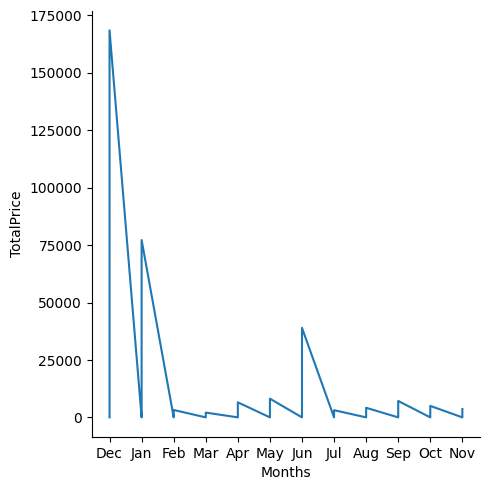

In [261]:
sns.relplot(data= data, x = data.Months, y = data.TotalPrice, errorbar=None, estimator = None, kind='line')
plt.savefig('E:/online retail.add this too.png', dpi = 300, bbox_inches='tight')
plt.show()

In [262]:
# Which day of the week has the most transactions?
data['DayName'] = data['InvoiceDate'].dt.day_name()
trasaction_by_day = data.groupby('DayName')['InvoiceNo'].nunique().sort_values(ascending=False)
print("Days of weeks with the Most Transactions")
print(trasaction_by_day)

Days of weeks with the Most Transactions
DayName
Thursday     4033
Wednesday    3455
Tuesday      3185
Monday       2863
Friday       2831
Sunday       2169
Name: InvoiceNo, dtype: int64


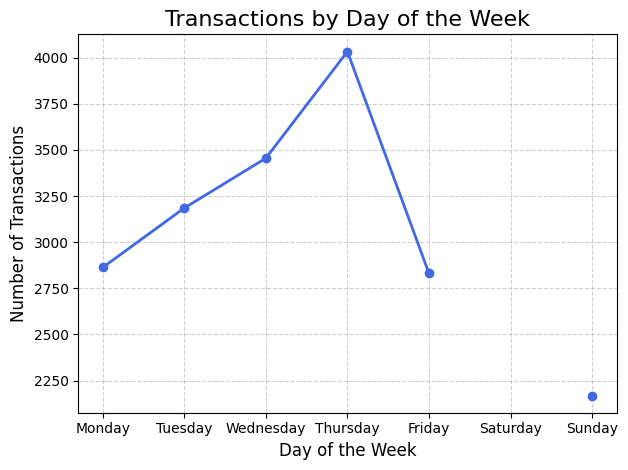

In [263]:
weekly_orders = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trasaction_by_day = trasaction_by_day.reindex(weekly_orders)


plt.Figure(figsize=(9,5))
plt.plot(trasaction_by_day.index, trasaction_by_day.values, marker='o', linewidth=2, color='royalblue')

# Add labels and title
plt.title('Transactions by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('E:/online retail.transaction by day of the week.png', dpi = 300, bbox_inches='tight')
plt.show()

In [264]:
# What hour of the day has the most sales (time pattern)?
data['Hour'] = data['InvoiceDate'].dt.hour
sales_by_hour = data.groupby('Hour')['TotalPrice'].sum().sort_values(ascending=False)
sales_by_hour

Hour
12    1378571.480
10    1261192.571
13    1173264.750
11    1104558.750
14     995629.371
15     966191.750
9      842605.171
16     468885.800
8      282115.630
17     234413.521
18     104954.430
19      49028.460
7       31059.210
20      18932.760
6           4.250
Name: TotalPrice, dtype: float64

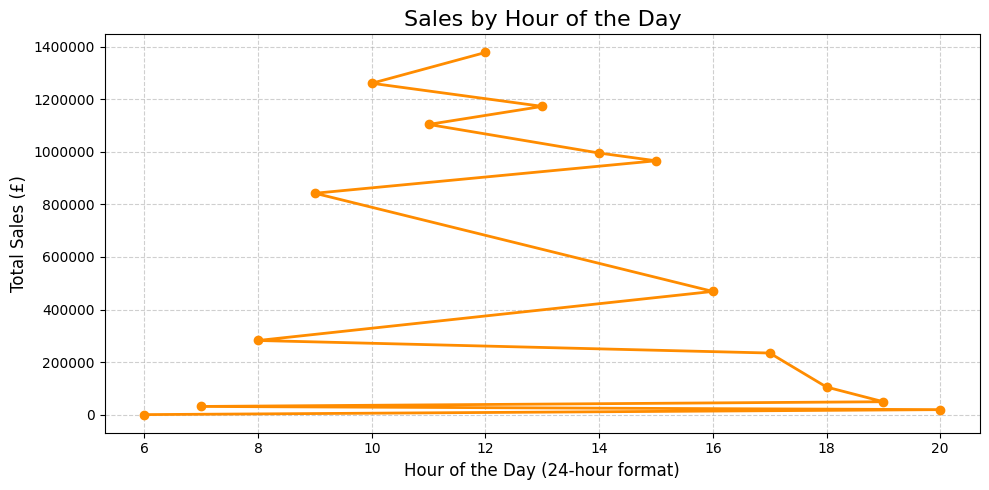

In [265]:
plt.figure(figsize=(10,5))
plt.plot(sales_by_hour.index, sales_by_hour.values, marker='o', linewidth=2, color='darkorange')

plt.title('Sales by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y') # this line disable scientific notation and shows actual values(Here on Y axis)

plt.tight_layout()
plt.savefig('E:/online retail.sales by hour of the day.png', dpi = 300, bbox_inches='tight')
plt.show()


## 📈 Step 3 — Visualizations (Matplotlib)

Line chart: Total monthly sales over time (trend).

Bar chart: Top 10 best-selling products (by revenue).

Bar chart: Sales by country.

Bar chart: Sales by weekday (Monday–Sunday).

Bar chart: Sales by hour of day.

Pie chart: Payment or country distribution (optional).

Histogram: Distribution of order values.


In [266]:
# Line chart: Total monthly sales over time (trend).

data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum()
monthly_sales

YearMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: TotalPrice, dtype: float64

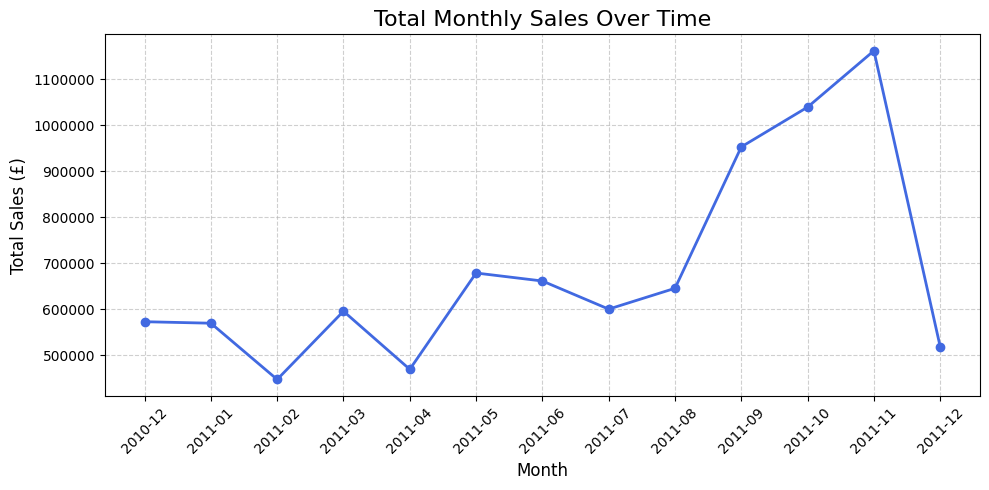

In [267]:
plt.figure(figsize=(10,5))

plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='royalblue', linewidth=2)


plt.title('Total Monthly Sales Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y')  # show normal numbers (not 1e6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('E:/online retail.Total monthly sales over time.png', dpi = 300, bbox_inches='tight')
plt.show()

In [268]:
# Bar chart: Top 10 best-selling products (by revenue).

data['Description'] = data['Description'].astype(str).str.strip()

best_selled = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
best_selled

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

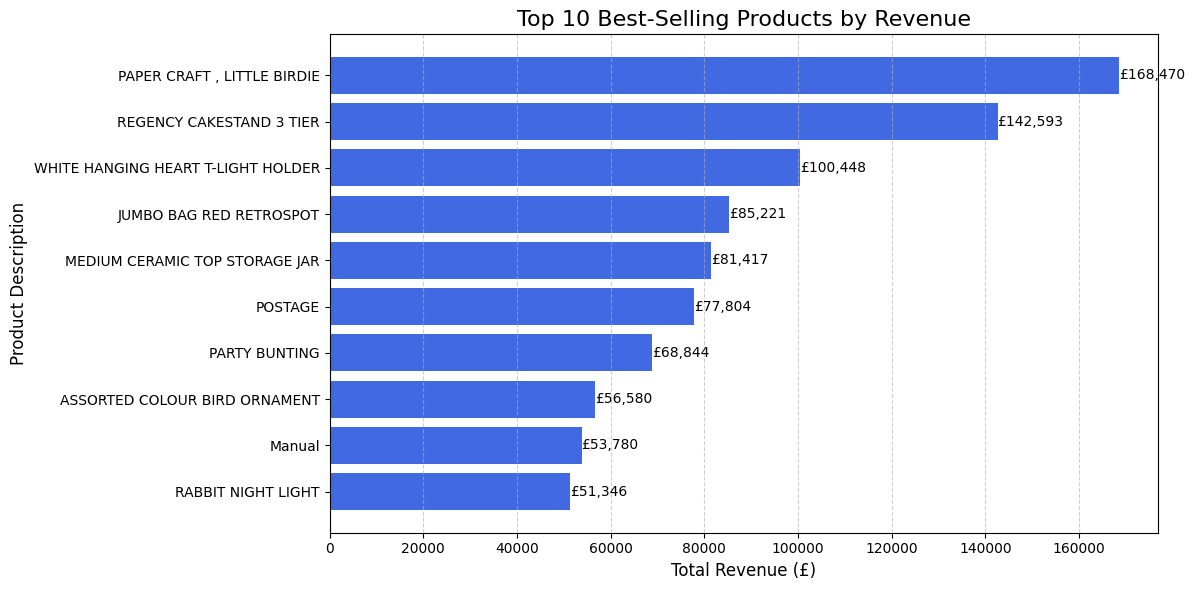

In [269]:
plt.figure(figsize=(12,6))
bars = plt.barh(best_selled.index[::-1], best_selled.values[::-1], color='royalblue')

# showing values with each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"£{bar.get_width():,.0f}", va='center', fontsize=10)


plt.title('Top 10 Best-Selling Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue (£)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('E:/online retail.top 10 best selling products by revenue.png', dpi = 300, bbox_inches='tight')
plt.show()


In [270]:
# Bar chart: Sales by country.

country_sales = data.groupby("Country")['TotalPrice'].sum().sort_values(ascending=False).head(15)
country_sales

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Japan               37416.370
Norway              36165.440
Portugal            33439.890
Finland             22546.080
Singapore           21279.290
Name: TotalPrice, dtype: float64

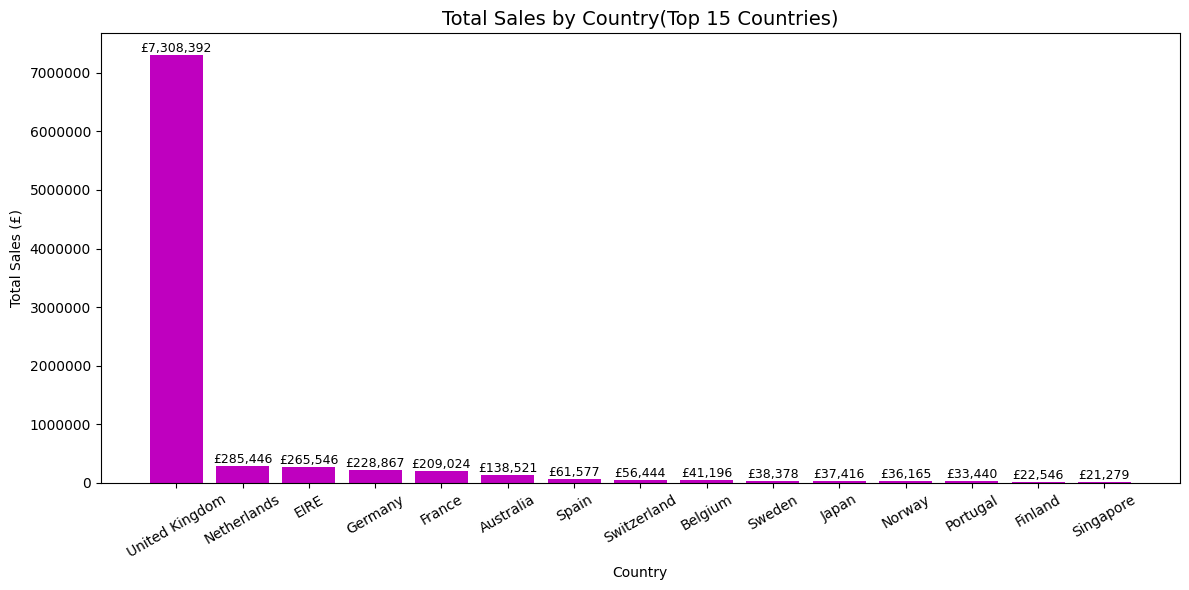

In [271]:
plt.figure(figsize=(12,6))

bars = plt.bar(country_sales.index, country_sales.values, color = 'm')

# showing values with each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"£{bar.get_height():,.0f}",
        ha='center', va='bottom', fontsize=9
    )

plt.title('Total Sales by Country(Top 15 Countries)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig('E:/online retail.Total sales by country.png', dpi = 300, bbox_inches='tight')
plt.show()

In [272]:
# Bar chart: Sales by weekday (Monday–Sunday).
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'] # saturday is NaN here
weekday_sales = data.groupby('DayName')['TotalPrice'].sum().reindex(days_order)
weekday_sales

DayName
Monday       1367146.411
Tuesday      1700634.631
Wednesday    1588336.170
Thursday     1976859.070
Friday       1485917.401
Sunday        792514.221
Name: TotalPrice, dtype: float64

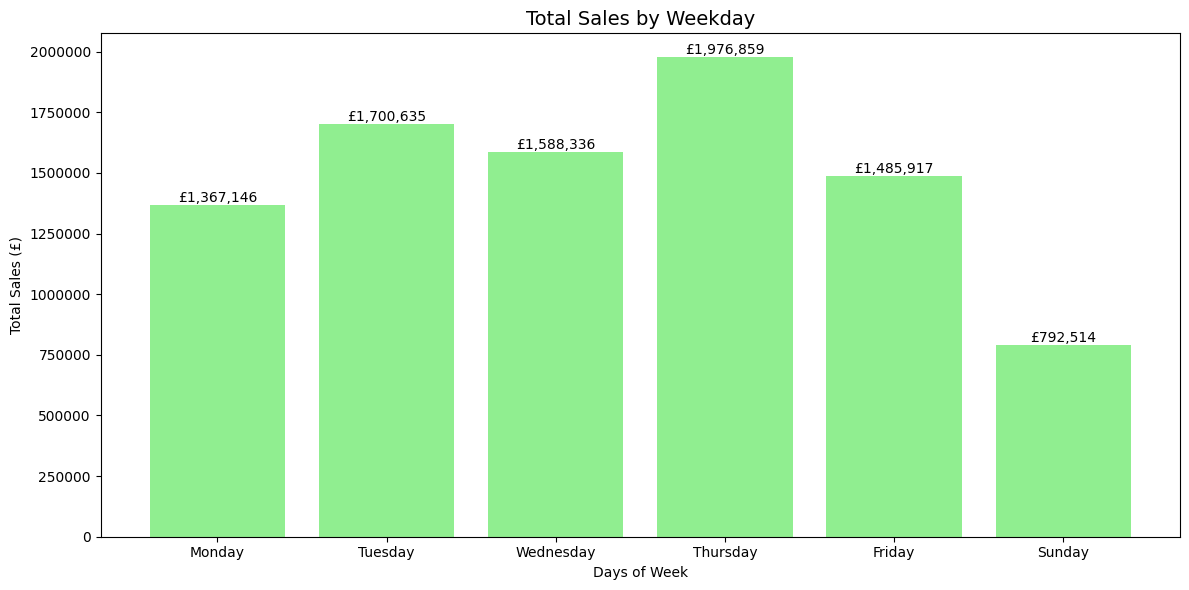

In [273]:
# Create bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(weekday_sales.index, weekday_sales.values, color='lightgreen')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"£{bar.get_height():,.0f}",
        ha='center', va='bottom', fontsize=10
    )


# Add title and labels
plt.title('Total Sales by Weekday', fontsize=14)
plt.xlabel('Days of Week')
plt.ylabel('Total Sales (£)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('E:/online retail.Total sales by weekday.png', dpi = 300, bbox_inches='tight')
plt.show()

In [274]:
# Bar chart: Sales by hour of day.

# hour_sales = data['InvoiceDate'].dt.hour

hourly_sales = data.groupby(data['InvoiceDate'].dt.hour)['TotalPrice'].sum().sort_values(ascending=False)
hourly_sales

InvoiceDate
12    1378571.480
10    1261192.571
13    1173264.750
11    1104558.750
14     995629.371
15     966191.750
9      842605.171
16     468885.800
8      282115.630
17     234413.521
18     104954.430
19      49028.460
7       31059.210
20      18932.760
6           4.250
Name: TotalPrice, dtype: float64

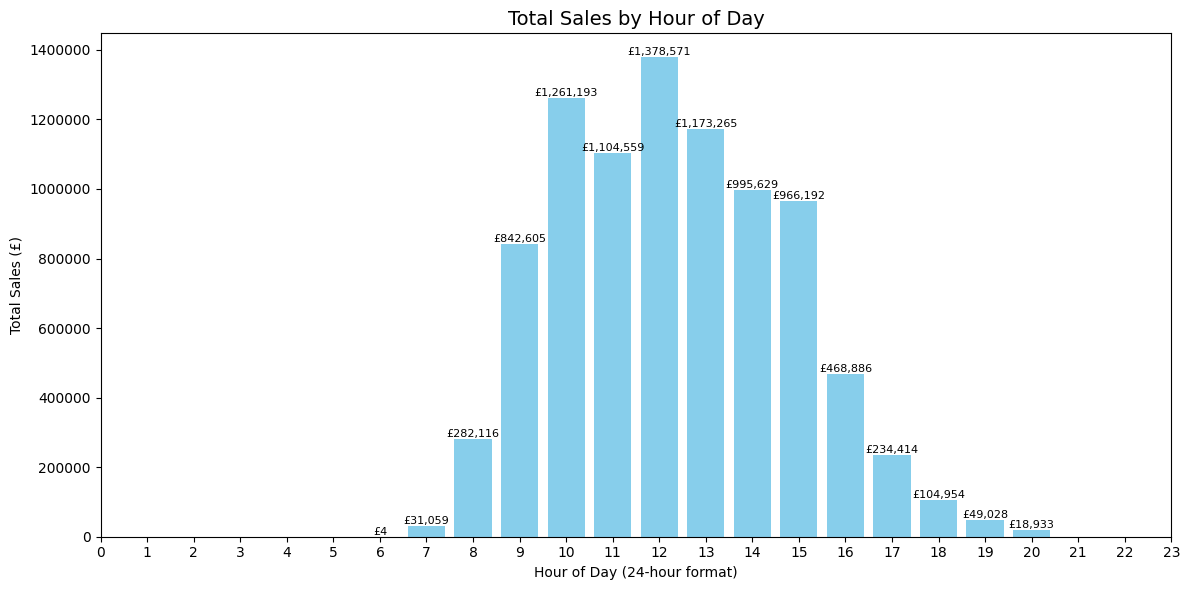

In [275]:
plt.figure(figsize=(12,6))
bars = plt.bar(hourly_sales.index, hourly_sales.values, color='skyblue')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2, bar.get_height(),
        f"£{bar.get_height():,.0f}",
        ha='center', va='bottom', fontsize=8
    )


plt.title('Total Sales by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Total Sales (£)')
plt.ticklabel_format(style= 'plain', axis = 'y')
plt.xticks(range(0, 24))  # show all 24 hours
plt.tight_layout()
plt.savefig('E:/online retail.Total sales by hour of day.png', dpi = 300, bbox_inches='tight')
plt.show()

In [276]:
# Pie chart: Payment or country distribution (optional).

country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
country_sales

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalPrice, dtype: float64

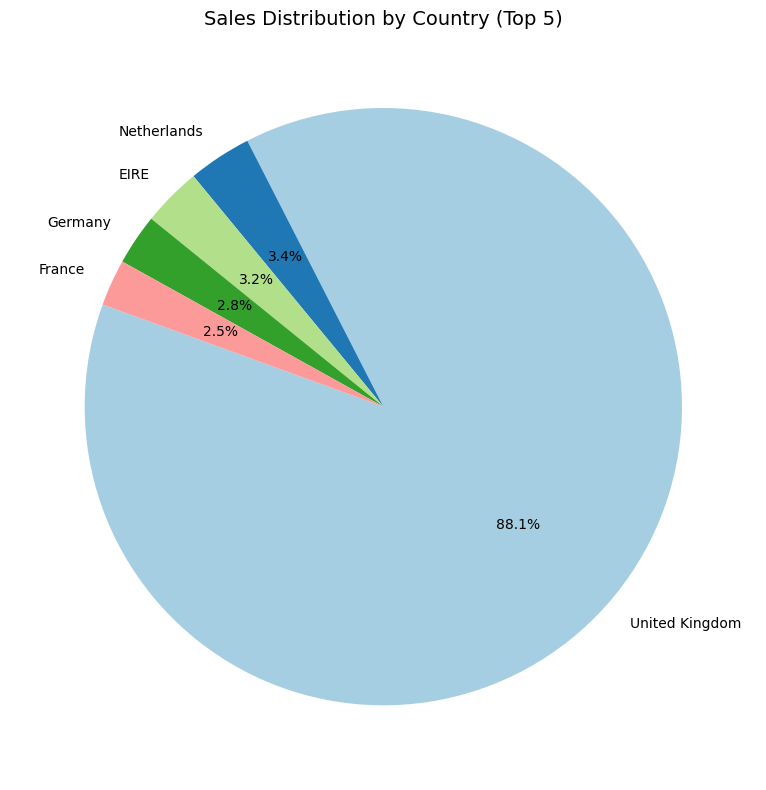

In [277]:

plt.figure(figsize=(8,8))
plt.pie(
    country_sales.values, 
    labels=country_sales.index,
    autopct='%1.1f%%',       # show percentages with 1 decimal
    startangle=160,          # rotate for better layout
    colors=plt.cm.Paired.colors # use nice color palette
)

plt.title('Sales Distribution by Country (Top 5)', fontsize=14)
plt.tight_layout()
plt.savefig('E:/online retail.Sales Distriution by country.png', dpi = 300, bbox_inches='tight')
plt.show()

In [278]:
# Histogram: Distribution of order values.

order_values = data.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending=False).head(50)
order_values

InvoiceNo
581483    168469.60
541431     77183.60
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
550461     21535.90
572035     20277.92
563076     19150.66
562439     18841.48
541220     16774.72
545475     16726.84
556255     16488.00
537659     15885.49
548011     15719.56
569650     15643.77
540815     15160.90
552883     14415.74
543989     14022.92
569570     13760.02
561901     13464.26
558526     13355.40
566934     13249.94
563590     13031.50
540689     12797.52
562789     12341.21
544479     11956.10
553546     11924.80
547708     11343.20
560445     11134.34
555920     10999.52
569815     10992.96
581175     10901.54
578305     10584.77
541206     10389.06
581457     10363.82
561633     10303.95
567280     10267.88
558262     10174.94
546789     10065.00
537657      9639.12
554366      9468.48
563074      9349.72
552978      9341.26
554827      8980.88
580727      8935.98
556726      8915.52
573153    

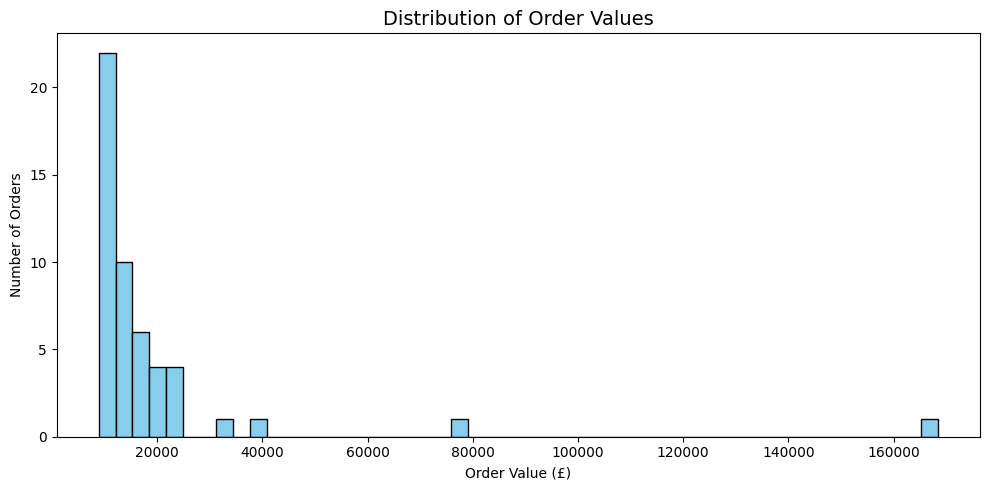

In [279]:
# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(order_values, bins=50, color='skyblue', edgecolor='black')


plt.title('Distribution of Order Values', fontsize=14)
plt.xlabel('Order Value (£)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.savefig('E:/online retail.Distriution of order values.png', dpi = 300, bbox_inches='tight')


plt.show()